# Laboratorio 2
## Procesamiento de Imágenes
### Identificación periocular
Integrantes: Isabel Marx Vergara y Jordan Isaac Pérez

## Imports

In [ ]:
#importación de librerías

from google.colab import drive
from google.colab import files
from IPython.display import clear_output
import numpy as np
from numpy.core.memmap import uint8
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow
from skimage.io import imread, imshow
from skimage.exposure import histogram, cumulative_distribution
from skimage.transform import rotate
from skimage import img_as_ubyte, img_as_float
from scipy.stats import norm
import math
from skimage.feature import local_binary_pattern

## Cargar datos desde drive:

In [ ]:
#carga de imagenes

drive.mount('/content/drive')
L = ['test','gal']
Im = {}
for i in range(2):
  Im[i] = {}
  for j in range(10):
    Im[i][j] = '/content/drive/My Drive/ojos_gal/ojos_' + L[i] + '/I'+ str(j+1) + '_' + L[i] + '.jpg'
Im[2] = {} 
for k in range(3):
  Im[2][k] = '/content/drive/My Drive/ojos_gal/ojos_impostor/ojos_impostor/imp_000' + str(k+1) + '.jpg'

clear_output(wait=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Im

{0: {0: '/content/drive/My Drive/ojos_gal/ojos_test/I1_test.jpg',
  1: '/content/drive/My Drive/ojos_gal/ojos_test/I2_test.jpg',
  2: '/content/drive/My Drive/ojos_gal/ojos_test/I3_test.jpg',
  3: '/content/drive/My Drive/ojos_gal/ojos_test/I4_test.jpg',
  4: '/content/drive/My Drive/ojos_gal/ojos_test/I5_test.jpg',
  5: '/content/drive/My Drive/ojos_gal/ojos_test/I6_test.jpg',
  6: '/content/drive/My Drive/ojos_gal/ojos_test/I7_test.jpg',
  7: '/content/drive/My Drive/ojos_gal/ojos_test/I8_test.jpg',
  8: '/content/drive/My Drive/ojos_gal/ojos_test/I9_test.jpg',
  9: '/content/drive/My Drive/ojos_gal/ojos_test/I10_test.jpg'},
 1: {0: '/content/drive/My Drive/ojos_gal/ojos_gal/I1_gal.jpg',
  1: '/content/drive/My Drive/ojos_gal/ojos_gal/I2_gal.jpg',
  2: '/content/drive/My Drive/ojos_gal/ojos_gal/I3_gal.jpg',
  3: '/content/drive/My Drive/ojos_gal/ojos_gal/I4_gal.jpg',
  4: '/content/drive/My Drive/ojos_gal/ojos_gal/I5_gal.jpg',
  5: '/content/drive/My Drive/ojos_gal/ojos_gal/I6_gal.jp

In [ ]:
def matrix(img):
  """
    funcion que retorna una tupla cuyos elementos son la dimensión de la matriz de datos asociado a una imagen cargada previamente y la propia matriz a color
    
    :param str img: nombre de la imagen a obtener su matriz de datos

    return (img.shape,img)
  """
  img = imread(img)
  return(img)

In [ ]:
def matrix0(img):
  """
  funcion que retorna una tupla cuyos elementos son la dimensión de la matriz de datos asociado a una imagen cargada previamente y la propia matriz en escala de grises
    
  :param str img: nombre de la imagen a obtener su matriz de datos

  return (img.shape,img)
  """
  img = cv2.imread(img,0)
  return(img.shape,img)

In [ ]:
def display(img):
  """
  funcion que retorna una visualización de la imagen asociada al nombre img
    
  :param str img: nombre de la imagen a obtener su visualización

  return (img.shape,img)
  """
  img = imread(img)
  plt.imshow(img)
  plt.title('Image')
  clear_output(wait=True)

In [ ]:
def display0(img):
  img = cv2.imread(img,0)
  plt.imshow(img, cmap='gray', vmin=0, vmax=255)
  plt.title('Image')
  clear_output(wait=True)

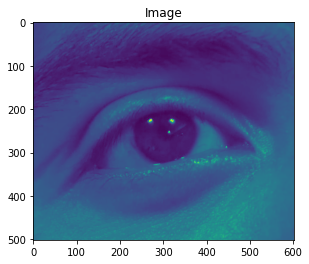

In [ ]:
display(Im[2][0])

In [ ]:
def grays(img):
  """
  funcion que retorna una visualización en escala de grises de la imagen asociada al nombre img y su histograma
    
  :param str img: nombre de la imagen a obtener su visualización

  return 
  """
  img = cv2.imread(img,0)
  fig, axs = plt.subplots(1, 2, figsize=(12,3.5))
  axs[0].imshow(img, cmap='gray', vmin=0, vmax=255)
  axs[0].set_title('Image')
  axs[1].hist(img.ravel(),256,[0,255],color='k')
  axs[1].set_title('Histogram')
  axs[1].set(ylabel='Pixels Frequency')
  axs[1].set(xlabel='Intensity')
  clear_output(wait=True)

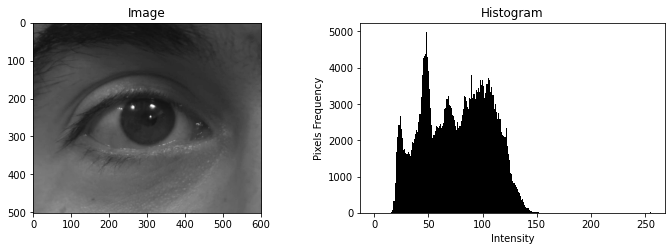

In [ ]:
grays(Im[0][0])

# 1. Implemente el algoritmo de análisis de textura LBP

In [ ]:
def b2D(binary):
    binary1 = binary
    decimal, i, n = 0, 0, 0
    while(binary != 0):
        dec = binary % 10
        decimal = decimal + dec * pow(2, i)
        binary = binary//10
        i += 1
    return(decimal)

In [ ]:
LBP = {}
LBP[0] = {} 
LBP[1] = {} 
LBP[2] = {} 

In [ ]:
# La función LBP recibe la carpeta(test = 1, gal = 2, impostor = 3) y el número de imágen
def lbp(folder,img):
  im = matrix(Im[folder][img])
  lbp0 = []
  for k in range(1,len(im)-1):
    k0 = k - 1
    for h in range(1,len(im[0])-1):
      m0 = np.zeros((3,3))
      h0 = h - 1
      for g in range(3):
        for f in range(3):
          if im[k0+1][h0+1] >= im[k0+g][h0+f]:
            m0[g][f] = 1
          else:
            m0[g][f] = 0
      m0 = m0.astype(int)
      m1 = []
      for v in range(3):
        m1.append(m0[0][v])
      m1.append(m0[1][2])
      l0 = list(np.flip(m0[2][0:3],0))
      for w in range(3):
        m1.append(l0[w])
      m1.append(m0[1][0])
      num = ''
      for p in range(8):
        num += str(m1[p])          
      num = int(num)
      lbp0.append(b2D(num))
  lbp0 = np.array(lbp0).reshape((500,600))
  fig, axs = plt.subplots(1, 2, figsize=(11,5))
  axs[0].imshow(im, cmap='gray', vmin=0, vmax=255)
  axs[0].set_title('Image')
  axs[1].imshow(lbp0, cmap='gray', vmin=0, vmax=255)
  axs[1].set_title('LBP Image')
  LBP[folder][img] = lbp0
  clear_output(wait=True)
  return(lbp0)

array([[199, 199, 255, ...,  31,  63, 126],
       [199, 199, 255, ...,  28,  14,  31],
       [199, 199, 255, ...,  24,  28,  31],
       ...,
       [207, 135, 199, ..., 255, 207, 255],
       [135, 135, 135, ..., 255, 223, 159],
       [135, 199, 199, ..., 255, 255, 255]])

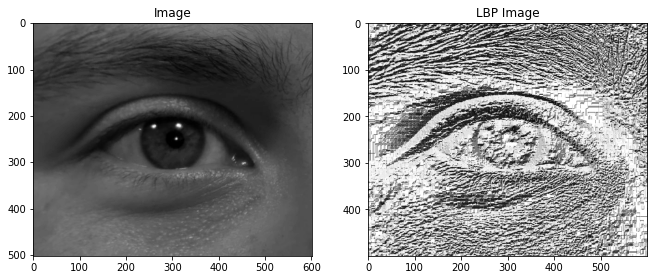

In [ ]:
lbp(1,1)

In [ ]:
def python_lbp(folder,img):
  m = matrix(Im[folder][img])
  a = local_binary_pattern(m, 8, 1)
  fig, axs = plt.subplots(1, 2, figsize=(11,5))
  axs[0].imshow(m, cmap='gray', vmin=0, vmax=255)
  axs[0].set_title('Image')
  axs[1].imshow(a, cmap='gray', vmin=0, vmax=255)
  axs[1].set_title('Python LBP Image')
  clear_output(wait=True)

In [ ]:
LBP

{0: {}, 1: {1: array([[199, 199, 255, ...,  31,  63, 126],
         [199, 199, 255, ...,  28,  14,  31],
         [199, 199, 255, ...,  24,  28,  31],
         ...,
         [207, 135, 199, ..., 255, 207, 255],
         [135, 135, 135, ..., 255, 223, 159],
         [135, 199, 199, ..., 255, 255, 255]])}, 2: {}}

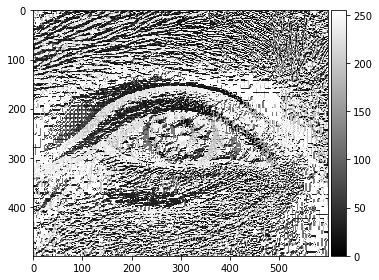

In [ ]:
imshow(LBP[1][1], cmap='gray', vmin=0, vmax=255)
clear_output(wait=True)

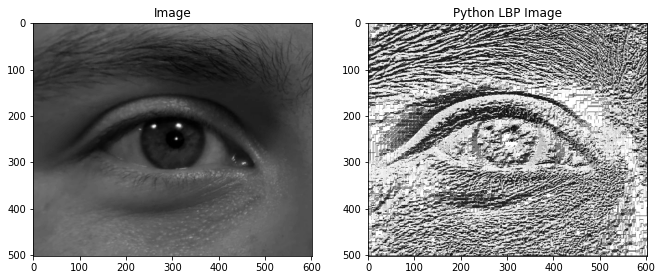

In [ ]:
python_lbp(1,1)

Lo primero que se observa en las imagenes obtenidas es que se resaltan principalmente los contornos y las texturas, quitando los colores y solo observando escalas de grises, donde ahora cada pixel tiene una representación que depende de los pixeles a su alrededor, y por tanto se captura mas información por pixel que solo su intensidad.

# 2. Desarrolle dos métodos para extraer un vector de características
## Método 1

In [ ]:
FEmet1 = {}
FEmet1[0] = {} 
FEmet1[1] = {} 
FEmet1[2] = {}

In [ ]:
def feat_ext_met1(lbp,folder,img):
  folders = ['test', 'gal', 'impostor']
  widths = []
  lengths = []
  bins = np.empty([0])
  A = np.empty([0], dtype=int)
  for i in range(5):
    for j in range(6):
      a = plt.hist(lbp[100*(i+1)-100:100*(i+1),100*(j+1)-100:100*(j+1)].ravel(),59,[0,58], color ='k')
      plt.close()
      if bins.shape == (0,):
        g = a[1]
        g = g[0:len(g)-1]
      else:
        g = a[1]+bins[1]+bins[len(bins)-1]
        g = g[0:len(g)-1]
      bins = np.concatenate((bins, g), axis=None)
      r = a[0].astype(int)
      A = np.concatenate((A, r), axis=None)
  plt.figure(figsize = (11,5))
  plt.bar([idx for idx in range(len(bins))], A, color ='k')
  plt.close()
  FEmet1[folder][img] = A
  return(A)

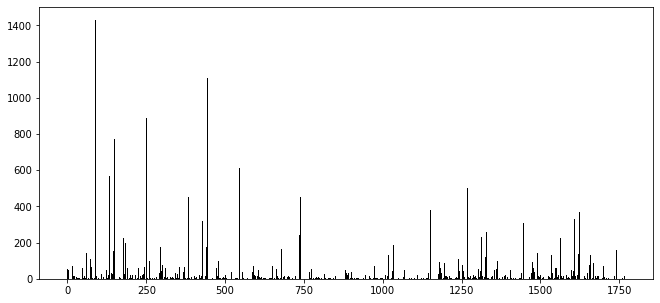

In [ ]:
b = feat_ext_met1(LBP[1][1],1,1)

## Método 2

In [ ]:
FEmet2 = {}
FEmet2[0] = {} 
FEmet2[1] = {} 
FEmet2[2] = {} 

In [ ]:
def feat_ext_met2(lbp,folder,img):
  folders = ['test', 'gal', 'impostor']
  widths = []
  lengths = []
  h = 0
  bins = np.empty([0])
  A = np.empty([0], dtype=int)
  for i in range(6):
    widths.append(50*i-50)
  for j in range(11):
    lengths.append(50*j-50)
  for i in range(6):
    for j in range(11):
      h += 1
      a = plt.hist(lbp[75*i:75*i+125,50*j:50*j+100].ravel(),59,[0,58], color ='k')
      plt.close()
      if bins.shape == (0,):
        g = a[1]
        g = g[0:len(g)-1]
      else:
        g = a[1]+bins[1]+bins[len(bins)-1]
        g = g[0:len(g)-1]
      bins = np.concatenate((bins, g), axis=None)
      r = a[0].astype(int)
      A = np.concatenate((A, r), axis=None)
  plt.figure(figsize = (24,5))
  plt.bar([idx for idx in range(len(bins))], A, color ='k')
  plt.close()
  FEmet2[folder][img] = A
  return(A)

# 3. Implemente medida de distancia

In [ ]:
def abs_dis(v1,v2):
  sum = 0
  for i in range(len(v1)):
    sum = sum + abs(v1[i]-v2[i])
  return(sum)

# 4. Construya una base de datos para cada método
## 4.1

In [ ]:
folder = 0
for i in range(10):
  lbp0 = lbp(folder,i)
  fe1 = feat_ext_met1(lbp0,folder,i)
  fe2 = feat_ext_met2(lbp0,folder,i)
folder = 1
for i in range(10):
  lbp0 = lbp(folder,i)
  fe1 = feat_ext_met1(lbp0,folder,i)
  fe2 = feat_ext_met2(lbp0,folder,i)
folder = 2
for i in range(3):
  lbp0 = lbp(folder,i)
  fe1 = feat_ext_met1(lbp0,folder,i)
  fe2 = feat_ext_met2(lbp0,folder,i)

In [ ]:
folder = 2
for i in range(3):
  lbp0 = lbp(folder,i)
  fe1 = feat_ext_met1(lbp0,folder,i)
  fe2 = feat_ext_met2(lbp0,folder,i)

In [ ]:
def reconocimiento_met1():
  D = {}
  D['distancia'] = {}
  for i in range(10):
    D['distancia'][i] = []
    m_d = 0
    for j in range(10):
      vmet1_0 = FEmet1[0][i]
      vmet1_1 = FEmet1[1][j]
      d = abs_dis(vmet1_0,vmet1_1)
      D['distancia'][i].append(d)
  min_d = {}
  min_d['min'] = []
  min_d['i'] = []
  min_d['j'] = []
  for i in range(10):
    min_d['min'].append(min(D['distancia'][i]))
    min_d['i'].append(i)
    min_d['j'].append(D['distancia'][i].index(min(D['distancia'][i])))
  for k in range(10):
    img0 = imread(Im[0][min_d['i'][k]])
    img1 = imread(Im[1][min_d['j'][k]])
    fig, axs = plt.subplots(1, 2, figsize=(11,5))
    axs[0].imshow(img0, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title('Image Test')
    axs[1].imshow(img1, cmap='gray', vmin=0, vmax=255)
    string = 'Image Gal – Distance = ' + str(min_d['min'][k])
    axs[1].set_title(string)
  return(D,min_d)

In [ ]:
min_d

{'min': [15294, 10269, 14454, 17095, 18630, 25053, 15756, 27038, 16814, 11975],
 'i': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'j': [0, 1, 2, 3, 4, 2, 6, 7, 8, 9]}

{'min': [15294, 10269, 14454, 17095, 18630, 25053, 15756, 27038, 16814, 11975],
 'i': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 'j': [0, 1, 2, 3, 4, 2, 6, 7, 8, 9]}

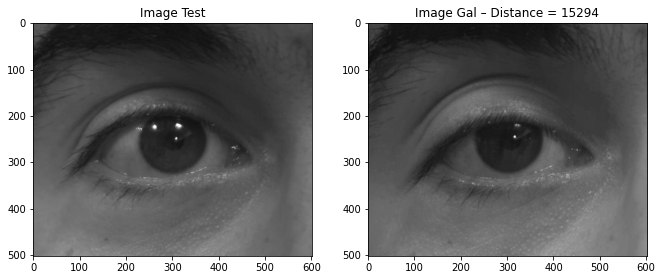

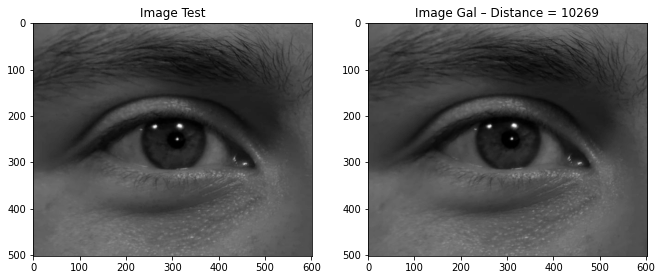

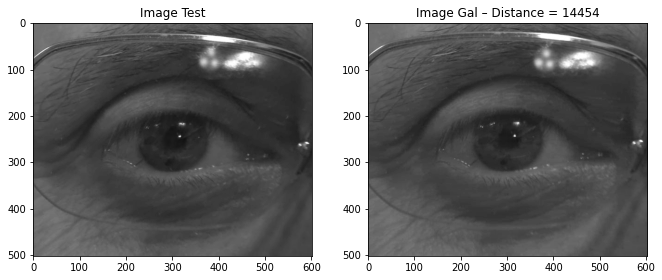

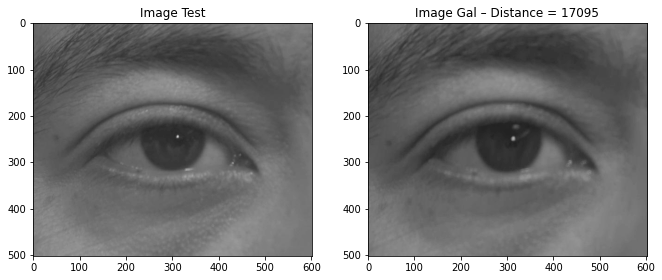

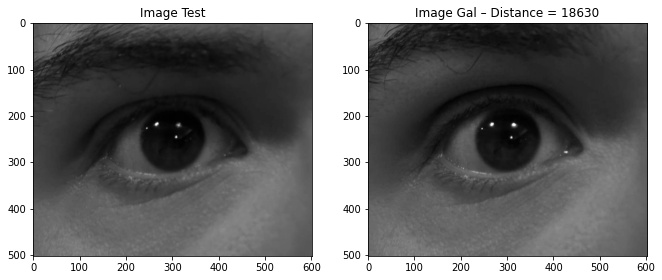

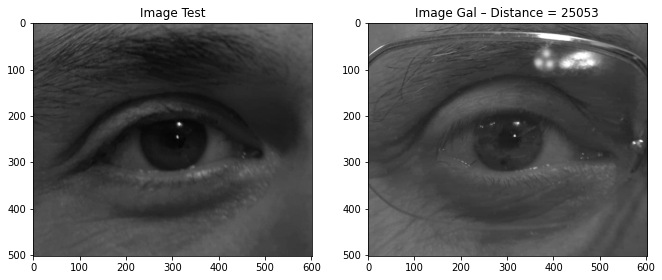

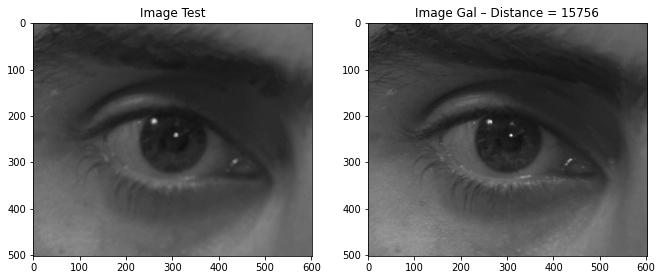

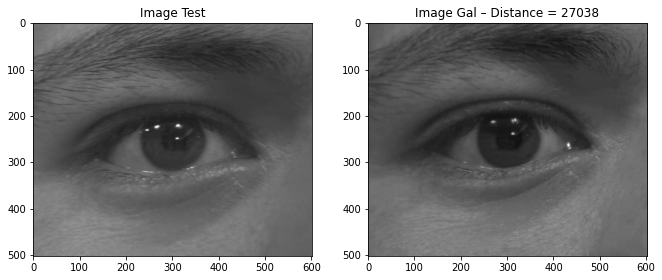

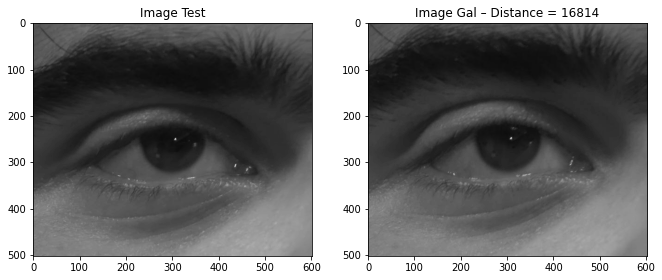

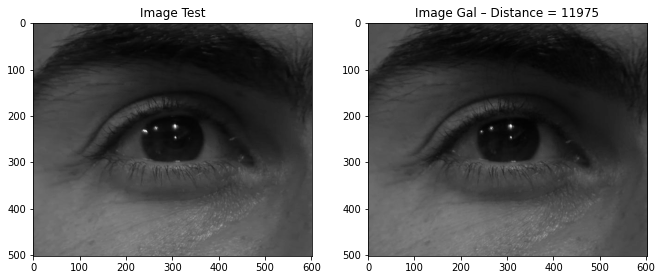

In [ ]:
a4_1 = reconocimiento_met1()
a4_1[1]

Como se observa en el diccionario anterior, se lograron reconocer 9 de 10 imágenes, exceptuando la quinta imagen del conjunto ojos_test, que con el algoritmo, erróneamente, se identifica con la segunda imagen de ojos_gal.

In [ ]:
def reconocimiento_met2():
  D2 = {}
  D2['distancia'] = {}
  for i in range(10):
    D2['distancia'][i] = []
    m_d = 0
    for j in range(10):
      vmet2_0 = FEmet2[0][i]
      vmet2_1 = FEmet2[1][j]
      d = abs_dis(vmet2_0,vmet2_1)
      D2['distancia'][i].append(d)
  min_d2 = {}
  min_d2['min'] = []
  min_d2['i'] = []
  min_d2['j'] = []
  for i in range(10):
    min_d2['min'].append(min(D2['distancia'][i]))
    min_d2['i'].append(i)
    min_d2['j'].append(D2['distancia'][i].index(min(D2['distancia'][i])))
  for k in range(10):
    img0 = imread(Im[0][min_d2['i'][k]])
    img1 = imread(Im[1][min_d2['j'][k]])
    fig, axs = plt.subplots(1, 2, figsize=(11,5))
    axs[0].imshow(img0, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title('Image Test')
    axs[1].imshow(img1, cmap='gray', vmin=0, vmax=255)
    string = 'Image Gal – Distance = ' + str(min_d2['min'][k])
    axs[1].set_title(string)
  return(D2,min_d2)

In [ ]:
a4_2 = reconocimiento_met2()
a4_2[1]

In [ ]:
def umbral():
  D3 = {}
  D3['distancia'] = {}
  D3['indice_gal'] = {}
  D3['indice_impostor'] = {}
  for j in range(3):
    D3['distancia'][j] = []
    D3['indice_gal'][j] = []
    D3['indice_impostor'][j] = []
    for i in range(10):
      vmet1_1 = FEmet1[1][i]
      vmet1_2 = FEmet1[2][j]
      d = abs_dis(vmet1_1,vmet1_2)
      D3['distancia'][j].append(d)
      D3['indice_gal'][j].append(i)
      D3['indice_impostor'][j].append(j)
  min_d3 = {}
  min_d3['min'] = []
  min_d3['i'] = []
  min_d3['j'] = []
  for i in range(len(D3['distancia'])):
    print(D3['distancia'])
    min_d3['min'].append(min(D3['distancia'][i]))
    min_d3['i'].append(i)
    min_d3['j'].append(D3['distancia'][i].index(min(D3['distancia'][i])))
  menor_d = 22000#float('inf')
  for h in range(len(min_d3['min'])):
    img0 = imread(Im[1][min_d3['i'][h]])
    img1 = imread(Im[2][min_d3['j'][h]])
    fig, axs = plt.subplots(1, 2, figsize=(11,5))
    axs[0].imshow(img0, cmap='gray', vmin=0, vmax=255)
    axs[0].set_title('Image Gal')
    axs[1].imshow(img1, cmap='gray', vmin=0, vmax=255)
    string = 'Image Impostor – Distance = ' + str(D3['distancia'][h])
    axs[1].set_title(string)
  return(D3,min_d3)

En caso de tener una imagen que no pertenece a la base de datos, la función reconocimiento de todas formas le asignará una distancia mínima con alguna de las imagenes del conjunto gal, haciendo el reconocimiento, lo cual es un problema, sin embargo, puede resolverse facilmente de la siguiente manera:

Tal como se tenía anteriormente para el caso de reconocimiento, ahora se tendrá que cada imagen del conjunto impostor tendrá asociada una mínima distancia entre todas las imagenes del conjunto gal, sin embargo, dado que las imagenes son de individuos que no pertenecen a la base de datos, se espera que las distancias sean aún mayores, por tanto, la idea es definir un umbral de distancia, tal que si la mínima distancia asociada a cada imagen en el conjunto de impostor es mayor que ese umbral, pueda reconocerse que efectivamente no pertenece a la base de datos. 

Este umbral se puede ir probando de forma práctica para aumentar los impostores detectados pero sin perjudicar los individuos reconocidos

In [ ]:
!jupyter nbconvert --to html /content/Lab2.ipynb

[NbConvertApp] Converting notebook /content/Lab2.ipynb to html
[NbConvertApp] Writing 2596213 bytes to /content/Lab2.html
